In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Project\Updated_netcdf\MODIS\modis_full_dataset.csv")
df.describe()

,DEPTH,LATITUDE,LONGITUDE,SALINITY,TEMPERATURE,CPHL,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16
count,459.000000,459.000000,459.000000,459.000000,459.000000,431.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,3.671255,17.813463,13.763921,32.815758,22.075430,0.350385,0.201929,0.115115,0.071078,0.052499,0.036283,0.006702,0.008268,0.004286,0.002624
std,4.015191,28.288599,75.596405,5.823072,8.880249,0.458761,0.183254,0.140187,0.125308,0.107514,0.088960,0.039729,0.040917,0.029155,0.024738
min,0.000199,-21.568310,-158.990000,6.230000,0.434000,-0.000750,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
25%,0.000249,0.651500,-26.036450,32.308002,14.639501,0.080000,0.060300,0.020650,0.002800,-0.003125,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
50%,2.006000,16.835220,11.660300,34.799002,26.575001,0.151000,0.145000,0.075750,0.027300,0.011750,0.004050,-0.004350,-0.004000,-0.004800,-0.004850
75%,5.708460,51.910000,75.282500,36.534002,28.909501,0.463550,0.301700,0.152100,0.087850,0.065750,0.039425,0.002300,0.002950,0.000825,0.000400
max,26.752193,58.880000,91.503000,37.607002,31.066001,3.815000,0.877500,0.890150,0.908700,0.899900,0.630450,0.480150,0.474450,0.259500,0.186050


## RF

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from scipy.stats import pearsonr


best_n_estimators = 100
best_max_depth = 25
best_min_samples_split = 2
best_min_samples_leaf = 4
best_max_features = 'sqrt'  

best_rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                               max_depth=best_max_depth, 
                               min_samples_split=best_min_samples_split, 
                               min_samples_leaf=best_min_samples_leaf, 
                               max_features=best_max_features)

feature_names = ['sur_refl_b08', 'sur_refl_b09',  'sur_refl_b10',  'sur_refl_b11',  'sur_refl_b12',  'sur_refl_b13',  'sur_refl_b14',  'sur_refl_b15',  'sur_refl_b16']

label = "SALINITY"

X = df[feature_names]
y = df[label]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Train the model
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

print('RMSE: ', rmse)
print('p-value: ', p_value)
print('r: ', r_value)

RMSE:  4.465259646340125
p-value:  5.158514225871265e-12
r:  0.54435929651943


#### Feature Importance

In [6]:
n_trees = 100
rf = ensemble.RandomForestRegressor(n_trees,random_state=42, max_depth = 10)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [8]:
# # Get feature importance scores
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# # y_pred = best_rf.predict(X_test)


feature_importance = rf.feature_importances_
print(feature_importance)

# Get feature importance scores
feature_importance = rf.feature_importances_
print(feature_importance)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
bands=['410', '443', '487', '531', '541', '667', '678', '748', '869']
feature_importance_df['Bands']=bands

# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


[0.23241395 0.12333402 0.11255677 0.12797046 0.15195895 0.07484503
 0.05687102 0.05524502 0.06480479]
[0.23241395 0.12333402 0.11255677 0.12797046 0.15195895 0.07484503
 0.05687102 0.05524502 0.06480479]
        Feature  Importance Bands
0  sur_refl_b08    0.232414   410
1  sur_refl_b09    0.123334   443
2  sur_refl_b10    0.112557   487
3  sur_refl_b11    0.127970   531
4  sur_refl_b12    0.151959   541
5  sur_refl_b13    0.074845   667
6  sur_refl_b14    0.056871   678
7  sur_refl_b15    0.055245   748
8  sur_refl_b16    0.064805   869


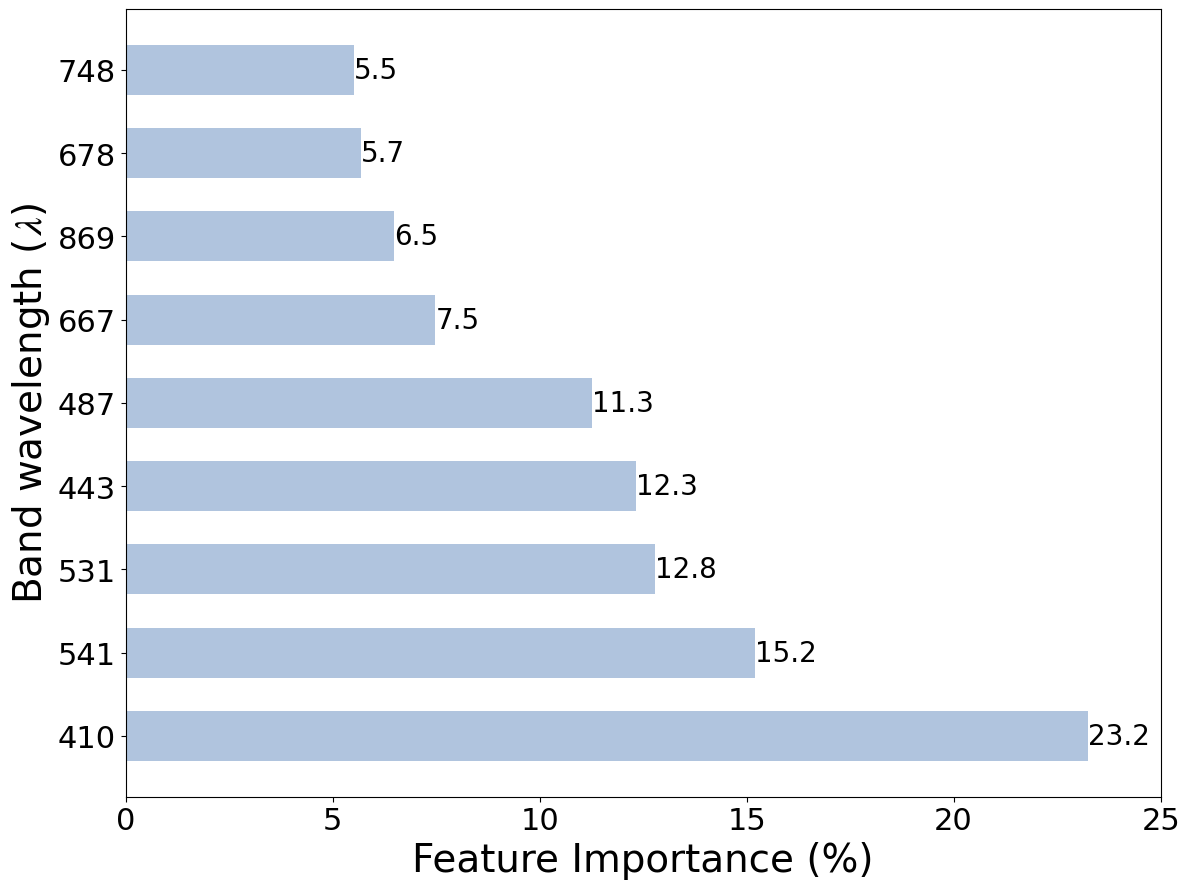

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rc

import os


# Sort the feature importance dataframe by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Set figure size
plt.figure(figsize=(12, 9))

# Plot the data with custom colors and make the bars thin
bars = plt.barh(feature_importance_df['Bands'], feature_importance_df['Importance'] * 100, color='lightsteelblue', height=0.6)



italics_lambda = '\U0001D706'
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Feature Importance (%)', fontsize=28)
plt.ylabel(u'Band wavelength (${\U0001D706}$)', fontsize=28)

# plt.ylabel('Band Wavelength ($\\lambda$)', fontsize=28)#, fontdict={'fontstyle': 'italic'})

# Set x-axis ticks from 0% to 25%
plt.xticks(range(0,30,5))

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', ha='left', va='center', fontsize=20, color='black')

# Invert the y-axis to have the most important features at the bottom
plt.gca().invert_yaxis()
plt.tight_layout()

#Specify the directory and filename for saving the image
# save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
# file_name = 'feature_importance_plot_modis_rf01.pdf'

# # Combine the directory and filename to create the full file path
# full_file_path = os.path.join(save_directory, file_name)

# # Adjust the layout to ensure all elements fit within the saved image
# plt.tight_layout()

# # Save the plot as an image with the specified directory
# plt.savefig(full_file_path, dpi=600)

# # Check if the image file exists
# if os.path.exists(full_file_path):
#     print(f'Image saved successfully to {full_file_path}')
# else:
#     print('Image not saved.')


plt.show()


In [ ]:
𝜆

In [5]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_rf = []
mbe_values_rf = []
me_values_rf = []

for i in range(100):  # Run the code 20 times
    feature_names = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
    rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
    X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['SALINITY'], test_size=0.3, random_state=42)

    
#     best_n_estimators = 450  
#     best_max_depth = 10  
#     best_min_samples_split = 4
#     best_min_samples_leaf = 1 
#     best_max_features = 'sqrt'  
    best_n_estimators = 10  
    best_max_depth = 10  
    best_min_samples_split = 2
    best_min_samples_leaf = 1 
    best_max_features = 'sqrt'  

    rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                                   max_depth=best_max_depth, 
                                   min_samples_split=best_min_samples_split, 
                                   min_samples_leaf=best_min_samples_leaf, 
                                   max_features=best_max_features)

    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_rf.append(rmse)  
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_rf.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_rf.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_rf = np.array(rmse_values_rf)
mbe_values_rf = np.array(mbe_values_rf)
me_values_rf = np.array(me_values_rf)

# Print or save the results as needed
print("RMSE values:", rmse_values_rf)
print("MBE values:", mbe_values_rf)
print("ME values:", me_values_rf)


RMSE values: [4.93902607 5.09766689 5.07123858 4.73274607 4.85104928 4.57196021
 4.79609718 5.06076831 4.7940381  4.53348442 4.69201583 4.65956418
 4.62649811 4.84762293 4.23577482 5.058176   4.59555846 4.68788713
 4.78122716 4.5936244  4.49981925 4.55546858 4.88574527 4.7107193
 4.3099273  4.78326088 4.68039501 4.72110624 4.88718702 4.57194978
 4.57136667 4.57880328 4.87650251 4.66214149 4.52266388 5.11754181
 4.53880711 4.87809912 4.94699977 4.75418295 4.7884507  4.82717296
 4.71969564 4.54160041 4.31126269 4.56148455 4.709809   4.95299601
 4.80005766 4.67721702 4.84473646 4.75702327 4.8268902  4.71644415
 4.47878985 4.84952685 4.96553053 4.74397582 4.47162454 4.46461
 4.94762604 4.5180622  4.90562453 4.61031851 4.80450395 4.7225758
 4.73986367 4.53975855 4.46540133 4.70581711 4.73683119 4.7395139
 4.61180899 4.60580079 4.4626508  5.18616444 5.04679278 4.66901974
 4.56012566 4.51911686 4.43116022 4.708399   4.54916064 4.9395427
 4.38966933 5.06511577 4.79653576 4.61916012 4.5181356  

#### Scatter Plot

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from math import sqrt

# from sklearn.ensemble import RandomForestRegressor

# best_n_estimators = 100
# best_max_depth = 25
# best_min_samples_split = 2
# best_min_samples_leaf = 4
# best_max_features = 'sqrt'  

# best_rf = RandomForestRegressor(n_estimators=best_n_estimators, 
#                                max_depth=best_max_depth, 
#                                min_samples_split=best_min_samples_split, 
#                                min_samples_leaf=best_min_samples_leaf, 
#                                max_features=best_max_features)

# rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
# X_train, X_test, y_train, y_test = train_test_split(df[rf_feature_name], df['SALINITY'], test_size=0.3, random_state=42)
# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# best_rf.fit(X_train,y_train)
# y_pred=best_rf.predict(X_test)

# rmse=sqrt(mean_squared_error(y_test, y_pred))
# print(rmse)
# # plt.scatter(y_test,y_pred)
# # plt.xlim(10,40)
# # plt.ylim(10,40)



rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
label = 'SALINITY'

X = df[rf_feature_name]
y = df[label]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
print(rmse)

4.609356300503825


P-Value in Custom Notation: 1.2 $\times$ 10$^{⁻¹⁰}$
Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average\scatter_plot_modis_rf.pdf


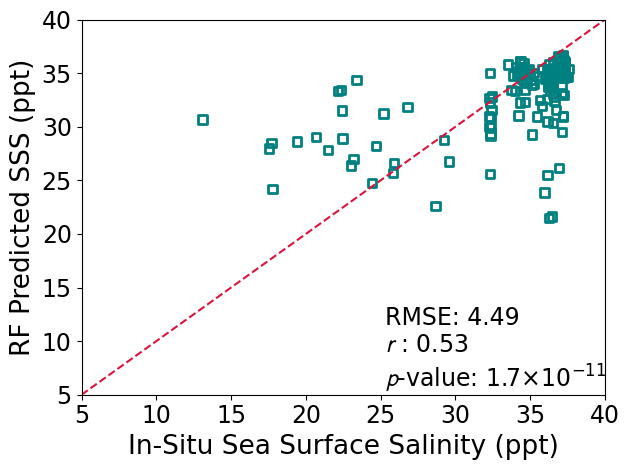

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


def int_to_superscript(value):
    superscript_dict = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }
    return ''.join(superscript_dict[c] for c in str(value))

if p_value == 0:
    p_value_str = "0.0"
else:
    exponent = 0
    while p_value < 1:
        p_value *= 10
        exponent -= 1
    exponent_str = int_to_superscript(exponent)
    p_value_str = "{:.1f} $\\times$ 10$^{{{}}}$".format(p_value, exponent_str)
    
print("P-Value in Custom Notation:", p_value_str)

# Create a line representing the identity line (y = x)
x_line = np.linspace(5, 40, 100)  
y_line = x_line  # y = x

# Identity line in red
plt.plot(x_line, y_line, color='crimson', linestyle='--')

# Set the plot limits to start from (5, 5)
plt.xlim(5, 40)
plt.ylim(5, 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Scatter plot for testing data (in dark blue) as squares
plt.scatter(y_test, y_pred, label='Testing Data', alpha=1, marker='s',facecolor='none', color='teal', linewidths=2)

# Add labels and legend
plt.xlabel('In-Situ Sea Surface Salinity (ppt)', fontsize=19)
plt.ylabel('RF Predicted SSS (ppt)', fontsize=19)
# plt.legend(fontsize=14)




# textstr = '\n'.join((
#     'RMSE: 5.11',
#     f'  : {r_value:.2f}',  
#     f'  -value: {p_value_str}'
# ))

# textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')


textstr = '\n'.join((
    'RMSE: 4.49',
    r'$\mathcal{r}$ : 0.53',
    r'$\mathcal{p}$-value: 1.7$\times$10$^{-11}$'))

plt.figtext(0.61, 0.185, textstr, fontsize=17)



# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average'
file_name = 'scatter_plot_modis_rf.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [11]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_rf = []
mbe_values_rf = []
me_values_rf = []

for i in range(100):  # Run the code 20 times
    feature_names = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
    rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
    X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['SALINITY'], test_size=0.3, random_state=42)

    
#     best_n_estimators = 450  
#     best_max_depth = 10  
#     best_min_samples_split = 4
#     best_min_samples_leaf = 1 
#     best_max_features = 'sqrt'  
    best_n_estimators = 10  
    best_max_depth = 10  
    best_min_samples_split = 2
    best_min_samples_leaf = 1 
    best_max_features = 'sqrt'  

    rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                                   max_depth=best_max_depth, 
                                   min_samples_split=best_min_samples_split, 
                                   min_samples_leaf=best_min_samples_leaf, 
                                   max_features=best_max_features)

    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_rf.append(rmse)  
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_rf.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_rf.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_rf = np.array(rmse_values_rf)
mbe_values_rf = np.array(mbe_values_rf)
me_values_rf = np.array(me_values_rf)

# Print or save the results as needed
print("RMSE values:", rmse_values_rf)
print("MBE values:", mbe_values_rf)
print("ME values:", me_values_rf)


RMSE values: [4.47537583 4.40550776 4.717662   4.79356288 4.81885522 4.78524267
 4.67528374 4.96201836 4.63273413 4.56946504 4.7910119  4.68172044
 4.72269234 4.34019721 4.82042806 4.83407943 4.64130991 4.46855601
 4.81224634 4.50069488 4.87928247 4.7533526  4.39118443 4.46147197
 4.79470399 4.51218856 4.48196428 5.07568011 4.67469012 4.79516209
 5.0437035  4.39153705 4.96139072 4.49240401 4.08932774 4.50651456
 4.41161239 4.96452072 4.59090357 4.75500677 4.25648531 4.32380043
 5.05614471 5.04670839 4.8066239  4.66877951 4.77481597 4.77343012
 4.69769337 4.60047925 4.67779193 4.81364213 4.72611766 4.97522915
 4.68347488 4.66621956 4.45203032 4.45091011 4.85199041 4.5653182
 4.79014742 4.73916945 4.34377968 4.40099442 4.82994041 4.74026181
 4.70772967 4.67795296 4.84200927 4.39032174 4.86241613 4.66315194
 4.37965113 4.92141948 4.868229   4.80436584 5.03802765 4.39041559
 4.68302732 4.49290719 4.70827258 4.4493935  4.72937516 4.7652418
 4.5263877  4.36627296 4.66946141 4.51630546 4.4004

########################################################################################

# SVM

In [23]:
from sklearn.svm import SVR

# Split the data into train and test sets
X = df[feature_names]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVR model
svr = SVR(kernel='linear')  # You can choose a different kernel if needed (e.g., 'rbf' or 'poly')
svr.fit(X_train, y_train)

# Get feature coefficients (importance) from SVR
feature_coefficients = np.abs(svr.coef_[0])
print(feature_coefficients)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_coefficients})
bands = ['410', '443', '487', '531', '541', '667', '678', '748', '869']
feature_importance_df['Bands'] = bands


# Use the SVR model for prediction (replace Random Forest)
y_pred = svr.predict(X_test)

# Calculate RMSE and other metrics as needed
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

print('RMSE: ', rmse)
print('p-value: ', p_value)
print('r: ', r_value)


[3.66823608 1.59049225 1.24139963 1.83331567 3.23598477 2.27419948
 2.00783061 1.33723157 1.03661814]
RMSE:  4.990405148944384
p-value:  6.556259922532611e-06
r:  0.3731542424870725


## RBF

In [24]:
svr_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
label = "SALINITY"

X = df[svr_feature_name]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.svm import SVR 
# Create an sv regressor
svr = SVR(kernel='rbf', C=1, epsilon=0.3, gamma=3)  

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

rmse=sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


4.867806399045873


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


SSR = np.sum((y_pred - (slope * y_test + intercept))**2)
SST = np.sum((y_test - np.mean(y_test))**2)
R_squared = 1 - (SSR / SST)

print("R-squared value:", R_squared)

R-squared value: 0.930084699053249


P-Value in Custom Notation: 1.1 $\times$ 10$^{⁻⁶}$
Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average\scatter_plot_modis_svr.pdf


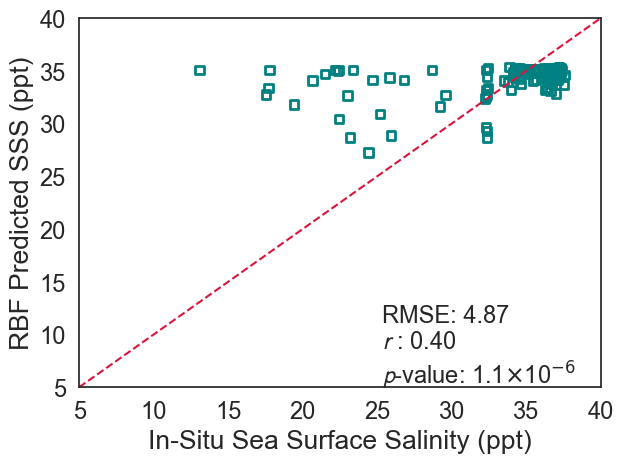

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats
import os
import math

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

SSR = np.sum((y_pred - (slope * y_test + intercept))**2)
SST = np.sum((y_test - np.mean(y_test))**2)
R_squared = 1 - (SSR / SST)

def int_to_superscript(value):
    superscript_dict = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }
    return ''.join(superscript_dict[c] for c in str(value))

if p_value == 0:
    p_value_str = "0.0"
else:
    exponent = 0
    while p_value < 1:
        p_value *= 10
        exponent -= 1
    exponent_str = int_to_superscript(exponent)
    p_value_str = "{:.1f} $\\times$ 10$^{{{}}}$".format(p_value, exponent_str)
    
print("P-Value in Custom Notation:", p_value_str)

# Create a line representing the identity line (y = x)
x_line = np.linspace(5, 40, 100)  
y_line = x_line  # y = x

# Identity line in red
plt.plot(x_line, y_line, color='crimson', linestyle='--')

# Set the plot limits to start from (5, 5)
plt.xlim(5, 40)
plt.ylim(5, 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Scatter plot for testing data (in dark blue) as squares
plt.scatter(y_test, y_pred, label='Testing Data', alpha=1, marker='s',facecolor='none', color='teal', linewidths=2)

# Add labels and legend
plt.xlabel('In-Situ Sea Surface Salinity (ppt)', fontsize=19)
plt.ylabel('RBF Predicted SSS (ppt)', fontsize=19)
# plt.legend(fontsize=14)




# textstr = '\n'.join((
#     'RMSE: 5.74',
#     f'  : {r_value:.2f}',  
#     f'  -value: {p_value_str}'
# ))

# textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')

textstr = '\n'.join((
    'RMSE: 4.87',
    r'$\mathcal{r}$ : 0.40',
    r'$\mathcal{p}$-value: 1.1$\times$10$^{-6}$'))

plt.figtext(0.61, 0.185, textstr, fontsize=17)



# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average'
file_name = 'scatter_plot_modis_svr.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_svr = []
mbe_values_svr = []
me_values_svr = []

for i in range(100):  # Run the code 100 times
    svr_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
    label = "SALINITY"
    X = df[feature_names]
    y = df[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Create an SVR regressor
    svr = SVR(kernel='rbf', C=1, epsilon=0.3, gamma=3)
    
    # Fit the model to the training data
    svr.fit(X_train, y_train)
    
    y_pred = svr.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values_svr.append(rmse)
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_svr.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_svr.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_svr = np.array(rmse_values_svr)
mbe_values_svr = np.array(mbe_values_svr)
me_values_svr = np.array(me_values_svr)

# Print or save the results as needed
print("RMSE values:", rmse_values_svr)
print("MBE values:", mbe_values_svr)
print("ME values:", me_values_svr)


RMSE values: [5.48705242 5.56063411 5.1961833  5.56659291 5.39668856 6.55495223
 6.11748567 6.0457025  6.45499995 6.19686973 6.0654074  5.77729316
 5.69587373 5.87487814 5.81565366 5.77520457 5.24435414 5.67082935
 6.27329168 5.69454348 5.86214348 5.69661971 5.22965543 5.24396462
 4.68015892 6.47461385 6.00364737 5.94923318 5.31923596 6.14307857
 5.29810547 5.97127626 6.26236766 6.09103153 6.07791793 5.98121597
 5.80817237 6.58350752 5.11737364 6.02814952 4.92535034 4.51419485
 4.82115279 5.60987355 5.45993821 6.26695971 4.47877448 5.72261084
 7.1469979  5.47669473 6.08860907 5.34526243 4.85614737 6.19404669
 5.56241044 6.52567243 6.32576627 5.88383361 5.07477621 5.32561616
 4.41184445 5.45714331 4.02662089 4.52105038 6.40514989 5.72491244
 6.77838658 5.34408598 5.15467277 6.29578208 5.93096122 6.24300653
 6.68296037 6.13963785 6.57661616 5.55072824 5.70684473 5.53016574
 5.93778277 6.00355801 6.35667028 6.11965406 6.15299653 5.63435926
 5.47568585 5.978741   5.35657556 6.44611652 5.53

## Laplace

In [28]:
from scipy import stats
from sklearn.preprocessing import StandardScaler


# def laplace_kernel(X1, X2):
#     gamma = 1  # You can adjust the kernel parameter as needed
#     return np.exp(-gamma * np.abs(X1[:, np.newaxis] - X2).sum(axis=2))
def laplacian_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))



C = 10
gamma =2
epsilon = 0.01 

feature_names = ['sur_refl_b08', 'sur_refl_b09',  'sur_refl_b10',  'sur_refl_b11',  'sur_refl_b12',  'sur_refl_b13',  'sur_refl_b14',  'sur_refl_b15',  'sur_refl_b16']
rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']

label = 'SALINITY'

X = df[rf_feature_name]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=57)

# Standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma)

svr_l = SVR(kernel='precomputed', C=C, gamma=gamma, epsilon=epsilon)

svr_l.fit(laplacian_matrix_train, y_train)



SVR(C=10, epsilon=0.01, gamma=2, kernel='precomputed')

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

laplacian_matrix_test = laplacian_kernel(X_test, X_train, gamma)

salinity_predictions = svr_l.predict(laplacian_matrix_test)

rmse = np.sqrt(mean_squared_error(y_test, salinity_predictions))
mae = mean_absolute_error(y_test, salinity_predictions)
r_value, _ = pearsonr(y_test, salinity_predictions)
r2 = r2_score(y_test, salinity_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Value: {r_value}")
print(f"R^2 Score: {r2}")

RMSE: 4.489856112529897
MAE: 2.8059873994915177
R-Value: 0.5044136968981732
R^2 Score: 0.2470172321564701


P-Value in Custom Notation: 2.8 $\times$ 10$^{⁻¹⁰}$
Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average\scatter_plot_modis_svr_laplace.pdf


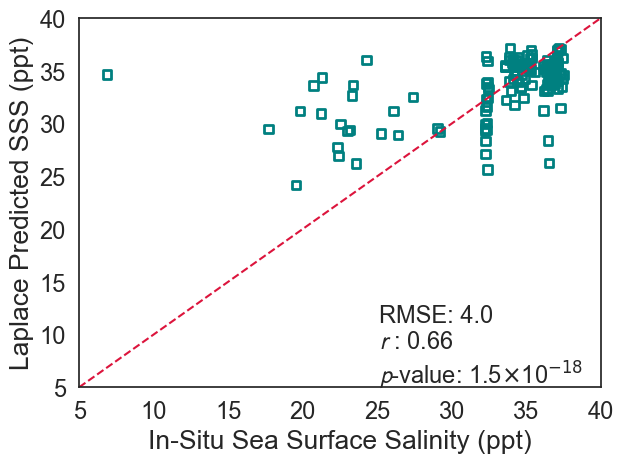

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats
import os

slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, salinity_predictions)


def int_to_superscript(value):
    superscript_dict = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }
    return ''.join(superscript_dict[c] for c in str(value))

if p_value == 0:
    p_value_str = "0.0"
else:
    exponent = 0
    while p_value < 1:
        p_value *= 10
        exponent -= 1
    exponent_str = int_to_superscript(exponent)
    p_value_str = "{:.1f} $\\times$ 10$^{{{}}}$".format(p_value, exponent_str)
    
print("P-Value in Custom Notation:", p_value_str)

# Create a line representing the identity line (y = x)
x_line = np.linspace(5, 40, 100)  
y_line = x_line  # y = x

# Identity line in red
plt.plot(x_line, y_line, color='crimson', linestyle='--')

# Set the plot limits to start from (5, 5)
plt.xlim(5, 40)
plt.ylim(5, 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Scatter plot for testing data (in dark blue) as squares
plt.scatter(y_test, salinity_predictions, label='Testing Data', alpha=1, marker='s',facecolor='none', color='teal', linewidths=2)

# Add labels and legend
plt.xlabel('In-Situ Sea Surface Salinity (ppt)', fontsize=19)
plt.ylabel('Laplace Predicted SSS (ppt)', fontsize=19)
# plt.legend(fontsize=14)




# textstr = '\n'.join((
#     'RMSE: 4.65',
#     f'  : {r_value:.2f}',  
#     f'  -value: {p_value_str}'
# ))

# textstr2 = '\n'.join(('r','p'))
# plt.figtext(0.65, .185, textstr2, fontsize=15, fontstyle='italic')

textstr = '\n'.join((
    'RMSE: 4.0',
    r'$\mathcal{r}$ : 0.66',
    r'$\mathcal{p}$-value: 1.5$\times$10$^{-18}$'))

plt.figtext(0.605, 0.185, textstr, fontsize=17)



# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\average'
file_name = 'scatter_plot_modis_svr_laplace.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=300, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

# Initialize empty arrays to store the results
rmse_values_svr_laplace = []
mbe_values_svr_laplace = []
me_values_svr_laplace = []

# Assuming you have a RandomForestRegressor instance named 'rf'
# and your data (X_train, X_test, y_train, y_test) are already prepared

C = 10
gamma = 1
epsilon = 0.1 

for i in range(100):  # Run the code 20 times
# Define your Laplacian kernel function



    def laplacian_kernel(X1, X2, gamma):
        return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2))



    X = df[feature_names]
    y = df[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Standarization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    laplacian_matrix_train = laplacian_kernel(X_train, X_train, gamma)
    laplacian_matrix_test = laplacian_kernel(X_test, X_train, gamma)

    svr_l = SVR(kernel='precomputed', C=C, gamma=gamma, epsilon=epsilon)

    svr_l.fit(laplacian_matrix_train, y_train)


    # Use the best SVR model with Laplacian kernel to predict salinity for testing data
    y_pred = svr_l.predict(laplacian_matrix_test)

    

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

    rmse_values_svr_laplace.append(rmse)  
    
    # Assuming you have observed and predicted values as numpy arrays
    observed_values = np.array(y_test)
    predicted_values = np.array(y_pred)

    # Calculate Mean Error (ME)
    mean_error = np.mean(predicted_values - observed_values)
    me_values_svr_laplace.append(mean_error)  # Append ME to the array

    # Calculate Mean Bias Error (MBE)
    mbe = np.mean(np.abs(predicted_values - observed_values))
    mbe_values_svr_laplace.append(mbe)  # Append MBE to the array

# Convert the result arrays to numpy arrays
rmse_values_svr_laplace = np.array(rmse_values_svr_laplace)
mbe_values_svr_laplace = np.array(mbe_values_svr_laplace)
me_values_svr_laplace = np.array(me_values_svr_laplace)

# Print or save the results as needed
print("RMSE values:", rmse_values_svr_laplace)
print("MBE values:", mbe_values_svr_laplace)
print("ME values:", me_values_svr_laplace)


RMSE values: [4.52272927 5.03043209 4.41606658 4.83204352 4.69342998 5.75211567
 5.38429155 5.3813632  5.6865641  5.83129779 5.66886648 4.88581305
 5.0845714  5.22798659 5.22049705 5.18510627 4.88293945 5.20066352
 5.60266517 4.73671913 5.48056588 4.84802014 4.64644549 4.83010529
 4.46721043 5.75811652 5.24341955 5.45682651 4.68555654 5.28938729
 4.51540794 5.267311   5.44908663 5.74152011 5.50110121 5.48522417
 5.08915605 5.77678973 4.51356688 5.4647779  4.2663852  4.06716744
 4.11040232 5.06285108 4.77864275 5.41749449 3.96598456 5.00879605
 6.42202845 4.41748795 5.68409175 4.58802839 4.2072651  5.49835848
 4.93069165 5.7941157  5.68165147 5.19929939 4.42459144 4.81835504
 4.19642161 5.09064512 4.0779866  3.93102497 5.57035751 4.9005363
 6.30884045 4.79892698 4.53677024 5.5896109  5.19841498 5.61870145
 6.07156291 5.50267548 5.98028349 4.94966717 5.3846913  4.80997991
 5.21639015 5.5854451  5.79429718 5.54019636 5.55513229 5.24262861
 4.49568664 5.20692401 5.07319016 5.95186569 4.975

## RMSE

In [14]:
df_rmse=pd.DataFrame({"RF":rmse_values_rf, "SVR_RBF":rmse_values_svr, "SVR_Laplace":rmse_values_svr_laplace})
# df_rmse=pd.DataFrame({"RF":rmse_values_svr_laplace, "SVR_RBF":rmse_values_svr, "SVR_Laplace":rmse_values_rf})
print(df_rmse.describe())

               RF     SVR_RBF  SVR_Laplace
count  100.000000  100.000000   100.000000
mean     5.118270    5.742099     4.717079
std      0.537476    0.564826     0.194721
min      3.931025    4.026621     4.235775
25%      4.768162    5.353747     4.568896
50%      5.198857    5.792733     4.713582
75%      5.501495    6.118028     4.845458
max      6.422028    7.146998     5.186164


In [15]:
#melt data frame into long format
df_rmse_melted = pd.melt(df_rmse)

#view first 10 rows of melted data frame
df_rmse_melted.head(10)

,variable,value
0,RF,4.522729
1,RF,5.030432
2,RF,4.416067
3,RF,4.832044
4,RF,4.693430
5,RF,5.752116
6,RF,5.384292
7,RF,5.381363
8,RF,5.686564
9,RF,5.831298


Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\violin_plot_modis_rmsee.pdf


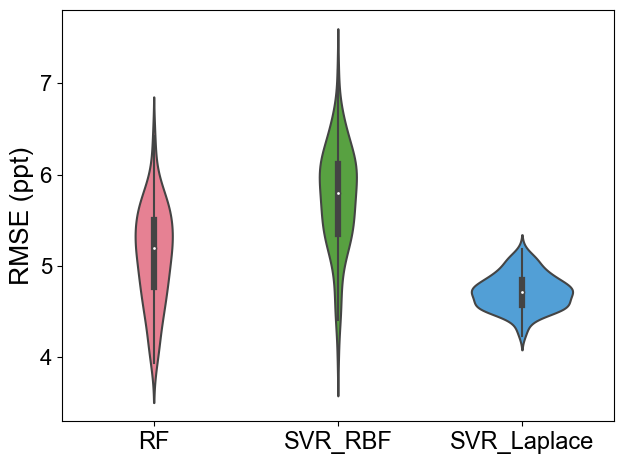

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(
    x='variable', y='value', data=df_rmse_melted,
    width=0.55,
    palette="husl",  
    inner="box",
     
)

sns.set(style="white")

plt.xlabel('', fontsize=20)
plt.ylabel('RMSE (ppt)', fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=16)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'violin_plot_modis_rmsee.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()


## MBE

In [17]:
df_mbe=pd.DataFrame({"RF":mbe_values_rf, "SVR_RBF":mbe_values_svr, "SVR_Laplace":mbe_values_svr_laplace})

print(df_mbe)

          RF   SVR_RBF  SVR_Laplace
0   2.767534  3.154710     3.413326
1   3.102408  3.125814     3.304710
2   2.750555  2.967364     3.345803
3   2.928316  3.196478     3.181080
4   2.806996  2.924801     3.441153
..       ...       ...          ...
95  3.161677  3.228026     3.170671
96  3.112660  3.103371     3.383437
97  3.265285  3.489754     3.312479
98  3.429009  3.346452     2.981348
99  2.636575  2.793267     3.339068

[100 rows x 3 columns]


In [18]:
#melt data frame into long format
df_mbe_melted = pd.melt(df_mbe)

#view first 10 rows of melted data frame
df_mbe_melted.head(10)

,variable,value
0,RF,2.767534
1,RF,3.102408
2,RF,2.750555
3,RF,2.928316
4,RF,2.806996
5,RF,3.446557
6,RF,3.190618
7,RF,3.169475
8,RF,3.497798
9,RF,3.037803


Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\violin_plot_modis_mbe.pdf


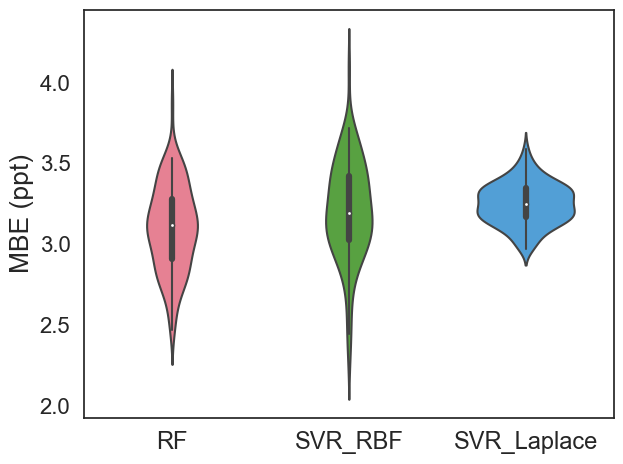

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(
    x='variable', y='value', data=df_mbe_melted,
    width=0.55,
    palette="husl",  
    inner="box",
     
)

sns.set(style="white")

plt.xlabel('', fontsize=20)
plt.ylabel('MBE (ppt)', fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=16)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'violin_plot_modis_mbe.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()


## ME

In [20]:
df_me=pd.DataFrame({"RF":me_values_rf, "SVR_RBF":me_values_svr, "SVR_Laplace":me_values_svr_laplace})
# df_me=pd.DataFrame({"RF":me_values_svr_laplace, "SVR_RBF":me_values_svr, "SVR_Laplace":me_values_rf})
print(df_me)

          RF   SVR_RBF  SVR_Laplace
0   1.045990  1.826526    -0.763112
1   0.962216  1.726631    -0.689979
2   0.887731  1.477994    -0.913838
3   0.944564  1.704118    -0.786406
4   1.055875  1.569370    -1.055229
..       ...       ...          ...
95  0.832523  1.673848    -0.831356
96  1.222641  1.824252    -1.148675
97  1.328560  2.311507    -0.935293
98  0.954584  1.785097    -0.589706
99  0.831776  1.387894    -0.838074

[100 rows x 3 columns]


In [21]:
#melt data frame into long format
df_me_melted = pd.melt(df_me)

#view first 10 rows of melted data frame
df_me_melted.head(10)

,variable,value
0,RF,1.045990
1,RF,0.962216
2,RF,0.887731
3,RF,0.944564
4,RF,1.055875
5,RF,1.835357
6,RF,1.352904
7,RF,1.090902
8,RF,1.304862
9,RF,1.273611


Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\violin_plot_modis_me.pdf


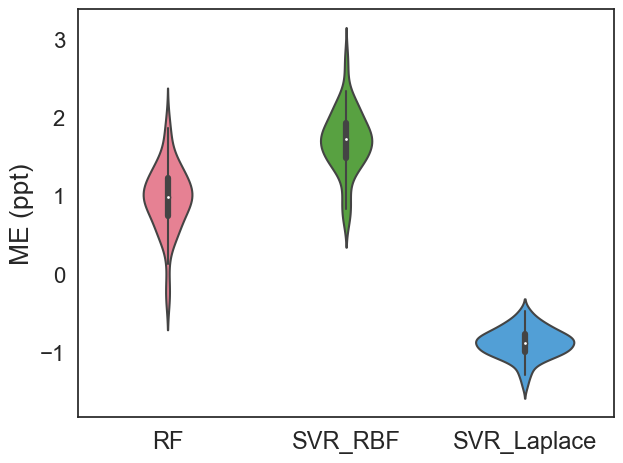

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(
    x='variable', y='value', data=df_me_melted,
    width=0.55,
    palette="husl",  
    inner="box",
     
)

sns.set(style="white")

plt.xlabel('', fontsize=20)
plt.ylabel('ME (ppt)', fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=16)

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'violin_plot_modis_me.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()
